# Libraries and data importing

Importing packages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn import preprocessing

Importing data

In [2]:
activities = pd.read_parquet('../data-raw/activities.parquet')
activities

,contributor,category,repository,activity,date
0,AmplabJenkins,bot,apache/spark,Commenting pull request,2022-11-25 09:55:19+00:00
1,AmplabJenkins,bot,apache/spark,Commenting pull request,2022-11-25 09:55:23+00:00
2,AmplabJenkins,bot,apache/spark,Commenting pull request,2022-11-25 09:55:26+00:00
3,analysis-bot,bot,facebook/react-native,Commenting pull request,2022-11-25 09:55:27+00:00
4,neos-bot,bot,neos/neos-ui-compiled,Pushing commits,2022-11-25 09:55:47+00:00
...,...,...,...,...,...
1015418,798388,human,879434,Reviewing code,2023-04-15 16:06:15+00:00
1015419,798388,human,879434,Reviewing code,2023-04-15 16:07:26+00:00
1015420,784775,human,643744,Creating branch,2023-04-15 16:07:33+00:00
1015421,784775,human,888378,Opening pull request,2023-04-15 16:08:07+00:00


# Heat Map

In [23]:
random_user = activities['contributor'].sample().values[0]
contributor = (
    activities[activities['contributor'] == random_user][['repository', 'activity']]
    .groupby(['repository', 'activity'])['activity']
    .count()
    .reset_index(name='n_activities')
    .set_index('repository')
    .rename_axis(None)
    .pivot(columns='activity', values='n_activities')
    .fillna(0)
    .astype(int)
)
contributor

activity,Adding collaborator to repository,Closing issue,Closing pull request,Commenting commit,Commenting issue,Commenting pull request,Commenting pull request changes,Creating branch,Creating tag,Deleting branch,Deleting tag,Opening issue,Opening pull request,Publishing a release,Pushing commits,Reopening issue,Reviewing code
337578,0,0,0,0,3,0,0,0,0,0,0,1,0,0,0,0,0
338876,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
348666,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,4
389695,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
459999,0,1,0,0,0,0,0,1,1,1,0,0,0,1,2,0,0
497536,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
537598,1,0,8,0,0,0,13,5,0,5,0,0,5,0,4,0,9
554968,0,1,3,0,0,3,8,0,0,0,0,1,0,0,0,0,6
556335,0,0,0,0,0,0,0,4,0,0,0,0,0,0,1,0,0
599478,0,2,230,0,4,82,191,132,2,126,1,0,129,0,132,0,191


In [24]:
random_user

'455745'

<Axes: xlabel='activity'>

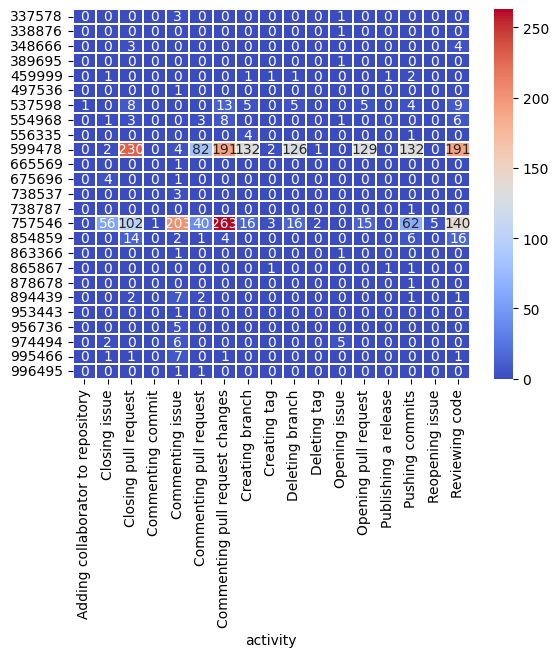

In [26]:
sns.heatmap(contributor, annot=True, fmt='d', cmap='coolwarm', linewidths=0.1)

<Axes: xlabel='activity'>

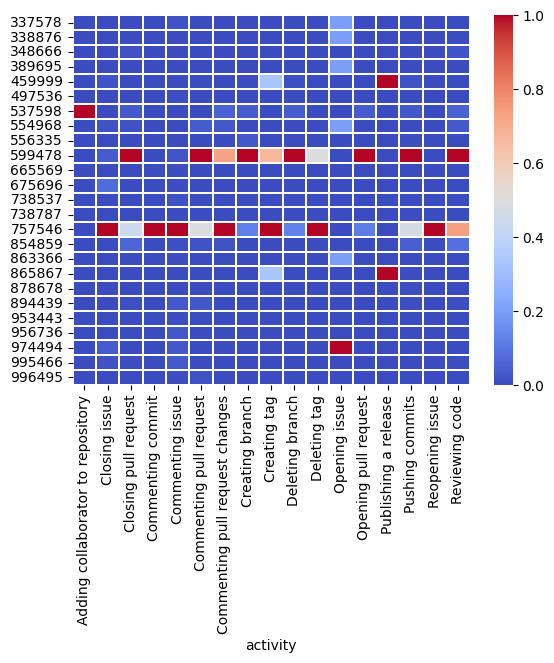

In [31]:
# By Activities
by_activities = contributor.div(contributor.max(axis=0), axis=1)
sns.heatmap(by_activities, annot=False, fmt='0.2f', cmap='coolwarm', linewidths=0.1)

<Axes: xlabel='activity'>

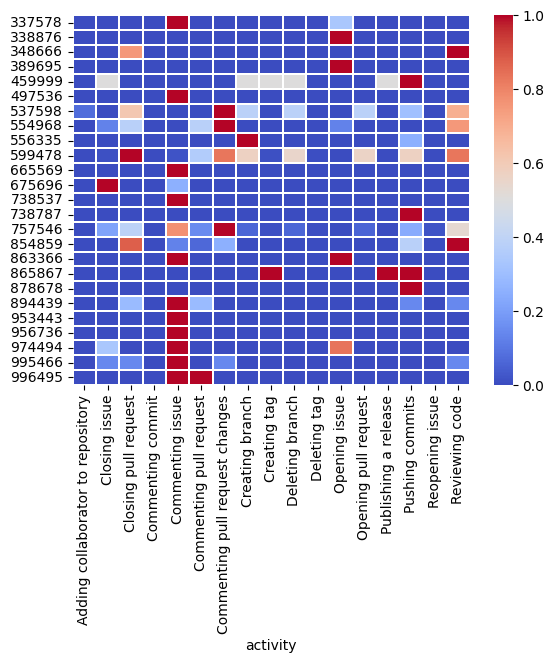

In [33]:
# By Repositories
by_repositories = contributor.div(contributor.max(axis=1), axis=0)
sns.heatmap(by_repositories, annot=False, fmt='0.2f', cmap='coolwarm', linewidths=0.1)

# Cluster Map

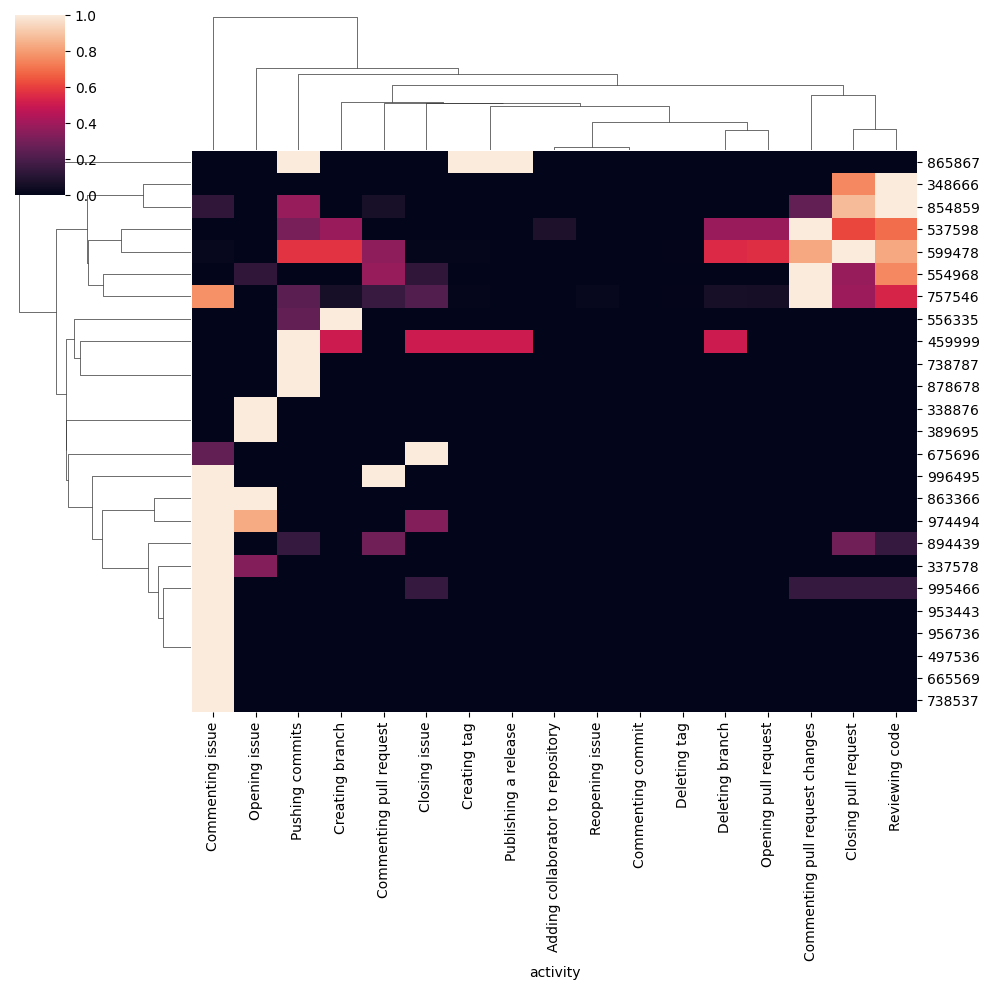

In [34]:
sns.clustermap(by_repositories, method='centroid')

In [ ]:
sns.clustermap(by_repositories, method='centroid')